In [32]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [1]:
import datetime
import os
from os import path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
plt.clf()

LOAN_DF = {'Agency_Code': 'str',
               'Agency_Code_Description': 'str',
               'Applicant_Income_000': 'str',
               'As_of_Year': 'int64',
               'Census_Tract_Number': 'str',
               'Conforming_Limit_000': 'float64',
               'Conforming_Status': 'str',
               'Conventional_Conforming_Flag': 'str',
               'Conventional_Status': 'str',
               'County_Code': 'str',
               'County_Name': 'str',
               'FFIEC_Median_Family_Income': 'float64',
               'Lien_Status_Description': 'str',
               'Loan_Amount_000': 'int64',
               'Loan_Purpose_Description': 'str',
               'Loan_Type_Description': 'str',
               'MSA_MD': 'str',
               'MSA_MD_Description': 'str',
               'Number_of_Owner_Occupied_Units': 'float64',
               'Respondent_ID': 'str',
               'Sequence_Number': 'int64',
               'State': 'str',
               'State_Code': 'int64',
               'Tract_to_MSA_MD_Income_Pct': 'float64'}
INSTITUTION_DF = {'Agency_Code': 'str',
                      'As_of_Year': 'int64',
                      'Assets_000_Panel': 'int64',
                      'Parent_City_TS': 'str',
                      'Parent_Name_TS': 'str',
                      'Parent_State_TS': 'str',
                      'Parent_ZIP_Code': 'str',
                      'Respondent_City_TS': 'str',
                      'Respondent_ID': 'str',
                      'Respondent_Name_TS': 'str',
                      'Respondent_State_TS': 'str',
                      'Respondent_ZIP_Code': 'str'}



fname1 = path.expanduser('~/Desktop/2012_to_2014_loans_data.csv')
loans = pd.read_csv(fname1, dtype=LOAN_DF,
                                na_values=['NA      ', 'NA    ', 'NA   ', 'NA', 'NA ', 'NA ', 'NaN', 'NAN', ''],
                                error_bad_lines=False, skipinitialspace=True)
fname2 = path.expanduser('~/Desktop/2012_to_2014_institutions_data.csv')
institutions = pd.read_csv(fname2, dtype=INSTITUTION_DF,
                                       na_values=['NA      ', 'NA    ', 'NA   ', 'NA', 'NA ', 'NA ', 'NaN', 'NAN', ''],
                                       error_bad_lines=False, skipinitialspace=True)

# CHANGE FINANCIAL

#HMDA Data (2012-2014)

Problem Statement:
Change Financial wants to expand and enter into the Home Loans market to sustain their growth. We have to do the analysis as to which region and section of the loan will be most profitable for the firm to start off their operations.

Hypothesis:
I hypothesize that it will be beneficial for the Change Financial to tap into the Refinance loans in the top markets. Refinancing is done to allow a borrower to obtain a better interest term and rate. The first loan is paid off, allowing the second loan to be created. That means the person who is applying for the Refinance loan is already vetted regarding the payment capabilities and credit history. It is less risky when compared to new purchase loans. We will try to assess the demand and supply of both purchase and refinance loans in all the states. 

In [17]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

In [2]:
total_amount_group_year = loans[['Loan_Amount_000', 'State', 'As_of_Year']] \
        .groupby(['State', 'As_of_Year']) \
        .agg({"Loan_Amount_000": 'sum'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','State','As_of_Year'], ascending=False)

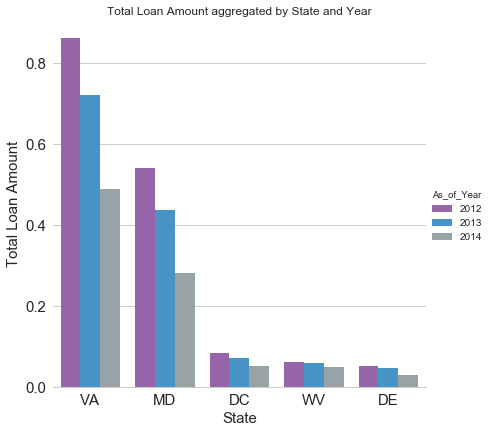

In [33]:
total_amount_group_year['Loan_Amount_000'] /= 1000
sns.set(style="whitegrid")

# Draw a nested barplot to show total loan amount for state and year
g = sns.factorplot(x="State", y="Loan_Amount_000", hue="As_of_Year", data=total_amount_group_year,
                   kind="bar",size=6, palette=sns.color_palette(flatui))
g.despine(left=True)
g.set_ylabels("Total Loan Amount",fontsize=15)
g.set_xlabels("State",fontsize=15)
g.set(title="Total Loan Amount aggregated by State and Year")
g.set_yticklabels(fontsize=15)
g.set_xticklabels(fontsize=15)

In [6]:
count_amount_group_year = loans[['Loan_Amount_000', 'State', 'As_of_Year']] \
        .groupby(['State', 'As_of_Year']) \
        .agg({"Loan_Amount_000": 'count'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','State','As_of_Year'], ascending=False)

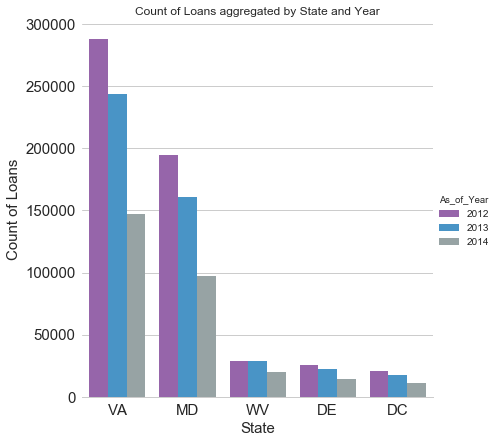

In [21]:
sns.set(style="whitegrid")

# Draw a nested barplot to show count of loans for state and year
g = sns.factorplot(x="State", y="Loan_Amount_000", hue="As_of_Year", data=count_amount_group_year,
                   kind="bar",size=6, palette=sns.color_palette(flatui))
g.despine(left=True)
g.set_ylabels("Count of Loans",fontsize=15)
g.set_xlabels("State",fontsize=15)
g.set(title="Count of Loans aggregated by State and Year")
g.set_yticklabels(fontsize=15)
g.set_xticklabels(fontsize=15)

In [22]:
avg_amount_group_year = loans[['Loan_Amount_000', 'State', 'As_of_Year']] \
        .groupby(['State', 'As_of_Year']) \
        .agg({"Loan_Amount_000": 'mean'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','State','As_of_Year'], ascending=False)

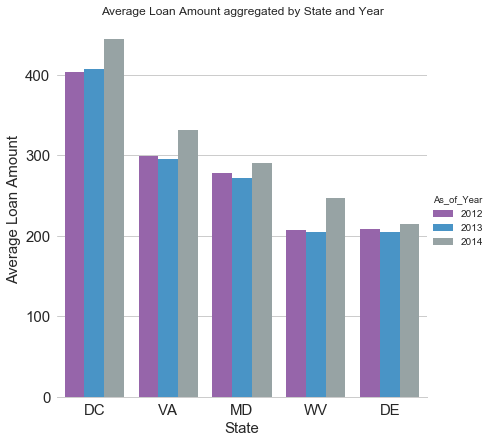

In [23]:
sns.set(style="whitegrid")

# Draw a nested barplot to show Avg loan amount for state and year
g = sns.factorplot(x="State", y="Loan_Amount_000", hue="As_of_Year", data=avg_amount_group_year,
                   kind="bar",size=6, palette=sns.color_palette(flatui))
g.despine(left=True)
g.set_ylabels("Average Loan Amount",fontsize=15)
g.set_xlabels("State",fontsize=15)
g.set(title="Average Loan Amount aggregated by State and Year")
g.set_yticklabels(fontsize=15)
g.set_xticklabels(fontsize=15)

We can visualize from the above set of plots that Virginia and Maryland are the top most regions among all the states in terms of Total Loan amount and counts of loan applications as well. Hence it will be good for Change Financial to start off from these two areas if they are planning to enter into the Home Loans Market.

Further we will assess how is the concentration of loans in the given states in terms of Purchase and Refinance categories.

In [8]:
total_amount_purpose_group_year = loans[['Loan_Amount_000', 'State', 'Loan_Purpose_Description']] \
        .groupby(['State', 'Loan_Purpose_Description']) \
        .agg({"Loan_Amount_000": 'sum'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','State','Loan_Purpose_Description'], ascending=False)

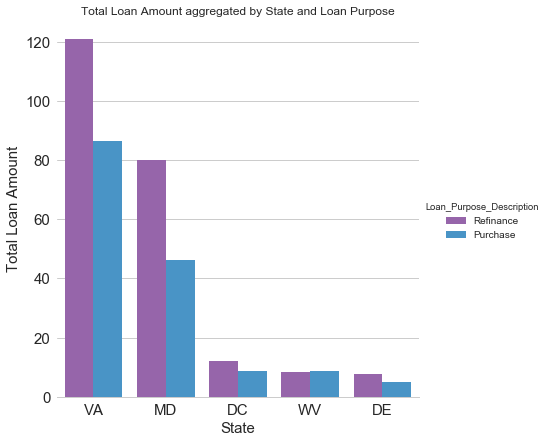

In [24]:
total_amount_purpose_group_year['Loan_Amount_000'] /= 1000
sns.set(style="whitegrid")

# Draw a nested barplot to show total loan amount for state and loan purpose
g = sns.factorplot(x="State", y="Loan_Amount_000", hue="Loan_Purpose_Description", data=total_amount_purpose_group_year,
                   kind="bar",size=6, palette=sns.color_palette(flatui))
g.despine(left=True)
g.set_ylabels("Total Loan Amount",fontsize=15)
g.set_xlabels("State",fontsize=15)
g.set(title="Total Loan Amount aggregated by State and Loan Purpose")
g.set_yticklabels(fontsize=15)
g.set_xticklabels(fontsize=15)

We can see from the above plot that the Refinance loans are much higher in number in almost all the states, most notably in Virginia and Maryland. This shows that all the other leading market institutes also prefer Refinance loans over Purchase loans. This almost proves our hypothesis that Refinance loans are less risky than Purchase loans as other institutions must also think that it is better to invest into it.

We will look further if there is an increase in the count and total amount of loans on a year to year basis.

In [10]:
total_purpose_group_year = loans[['Loan_Amount_000', 'Loan_Purpose_Description', 'As_of_Year']] \
        .groupby(['Loan_Purpose_Description', 'As_of_Year']) \
        .agg({"Loan_Amount_000": 'sum'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','Loan_Purpose_Description','As_of_Year'], ascending=False)

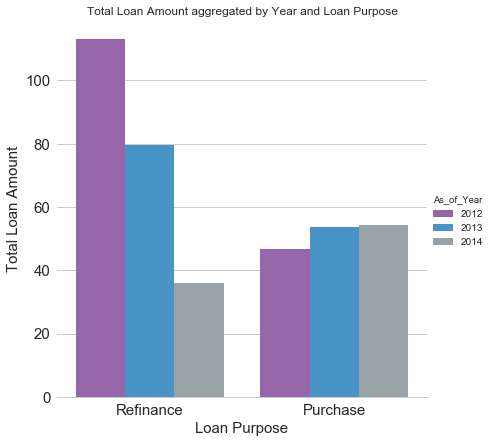

In [25]:
total_purpose_group_year['Loan_Amount_000'] /= 1000
sns.set(style="whitegrid")

# Draw a nested barplot to show total loan amount for loan purpose and year
g = sns.factorplot(x="Loan_Purpose_Description", y="Loan_Amount_000", hue="As_of_Year", data=total_purpose_group_year,
                   kind="bar",size=6, palette=sns.color_palette(flatui))
g.despine(left=True)
g.set_ylabels("Total Loan Amount",fontsize=15)
g.set_xlabels("Loan Purpose",fontsize=15)
g.set(title="Total Loan Amount aggregated by Year and Loan Purpose")
g.set_yticklabels(fontsize=15)
g.set_xticklabels(fontsize=15)

In [14]:
count_purpose_group_year = loans[['Loan_Amount_000', 'Loan_Purpose_Description', 'As_of_Year']] \
        .groupby(['Loan_Purpose_Description', 'As_of_Year']) \
        .agg({"Loan_Amount_000": 'count'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','Loan_Purpose_Description','As_of_Year'], ascending=False)

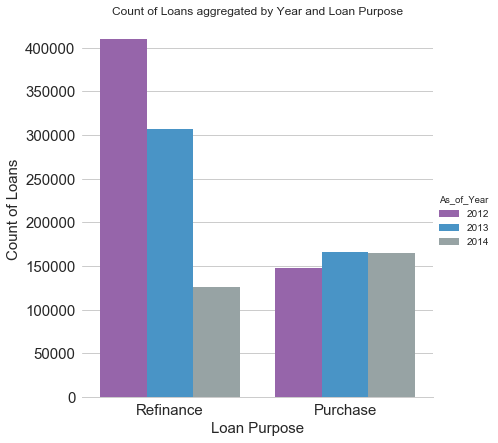

In [29]:
sns.set(style="whitegrid")

# Draw a nested barplot to show count of loans for loan purpose and year
g = sns.factorplot(x="Loan_Purpose_Description", y="Loan_Amount_000", hue="As_of_Year", data=count_purpose_group_year,
                   kind="bar", size=6, palette=sns.color_palette(flatui))
g.despine(left=True)
g.set_ylabels("Count of Loans",fontsize=15)
g.set_xlabels("Loan Purpose",fontsize=15)
g.set(title="Count of Loans aggregated by Year and Loan Purpose")
g.set_yticklabels(fontsize=15)
g.set_xticklabels(fontsize=15)

In [26]:
avg_purpose_group_year = loans[['Loan_Amount_000', 'Loan_Purpose_Description', 'As_of_Year']] \
        .groupby(['Loan_Purpose_Description', 'As_of_Year']) \
        .agg({"Loan_Amount_000": 'mean'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','Loan_Purpose_Description','As_of_Year'], ascending=False)

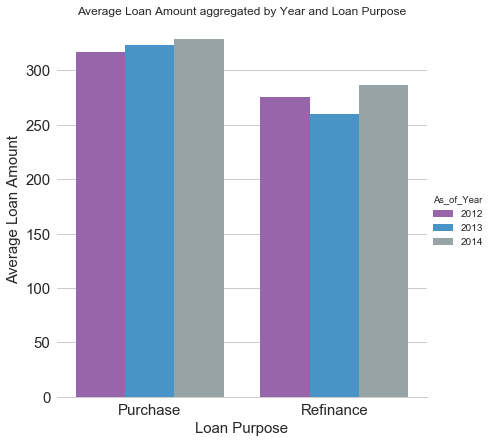

In [28]:
sns.set(style="whitegrid")

# Draw a nested barplot to show average loan amount for loan purpose and year
g = sns.factorplot(x="Loan_Purpose_Description", y="Loan_Amount_000", hue="As_of_Year", data=avg_purpose_group_year,
                   kind="bar",size=6, palette=sns.color_palette(flatui))
g.despine(left=True)
g.set_ylabels("Average Loan Amount",fontsize=15)
g.set_xlabels("Loan Purpose",fontsize=15)
g.set(title="Average Loan Amount aggregated by Year and Loan Purpose")
g.set_yticklabels(fontsize=15)
g.set_xticklabels(fontsize=15)

From the above plots, we can see that there is a negative growth in Refinance category of the Home Loans market on a year to year basis. There is a slight positive growth for the New Purchase loans category but it is not very substantial. But barring the year of 2014 when purchase loans were higher than Refinance loans, we can see that Refinance loans have a higher market penetration both in terms of Total loan amount and the count of loans. There are maybe some external factors due to which Purchase loans have a higher market share in 2014. But apart from this anamoly, we can clearly see that Refinance loans have an overall greater market share with majority of them bein concentrated in Virginia and Maryland states.

Hence it is safe to assume that Change Financial will be better off to start in the Refinance category in Virginia and Maryland states.